*CUSTOMER CHURN PREDICTION*

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("customer_churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
import numpy as np

In [5]:
#clean data
df.drop('customerID', axis=1, inplace=True)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.dropna(inplace=True)

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

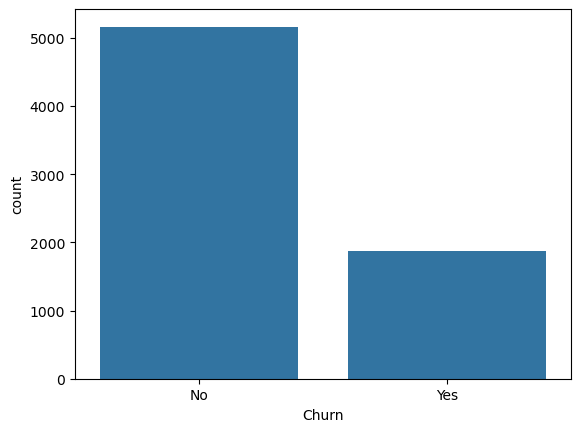

In [8]:
#plotting
sns.countplot(x='Churn', data=df)
plt.show()

In [9]:
#convert text to numbers
df_encoded = pd.get_dummies(df, drop_first=True)
df_encoded.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,1,29.85,29.85,False,True,False,False,True,False,...,False,False,False,False,False,True,False,True,False,False
1,0,34,56.95,1889.50,True,False,False,True,False,False,...,False,False,False,True,False,False,False,False,True,False
2,0,2,53.85,108.15,True,False,False,True,False,False,...,False,False,False,False,False,True,False,False,True,True
3,0,45,42.30,1840.75,True,False,False,False,True,False,...,False,False,False,True,False,False,False,False,False,False
4,0,2,70.70,151.65,False,False,False,True,False,False,...,False,False,False,False,False,True,False,True,False,True


In [11]:
#separate features and target variable
X = df_encoded.drop('Churn_Yes', axis=1)
y = df_encoded['Churn_Yes']

In [12]:
#Split the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
#logistic regression model
from sklearn.linear_model import LogisticRegression

In [14]:
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

c:\Users\athar\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [15]:
#evaluate the model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

lr_preds = lr_model.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, lr_preds))
print("Confusion Matrix:\n", confusion_matrix(y_test, lr_preds))
print("Classification Report:\n", classification_report(y_test, lr_preds))

Logistic Regression Accuracy: 0.7874911158493249
Confusion Matrix:
 [[916 117]
 [182 192]]
Classification Report:
               precision    recall  f1-score   support

       False       0.83      0.89      0.86      1033
        True       0.62      0.51      0.56       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407



In [16]:
#random forest model
from sklearn.ensemble import RandomForestClassifier

In [17]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [18]:
#evaluate the model
rf_preds = rf_model.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, rf_preds))
print("Confusion Matrix:\n", confusion_matrix(y_test, rf_preds))
print("Classification Report:\n", classification_report(y_test, rf_preds))

Random Forest Accuracy: 0.7853589196872779
Confusion Matrix:
 [[927 106]
 [196 178]]
Classification Report:
               precision    recall  f1-score   support

       False       0.83      0.90      0.86      1033
        True       0.63      0.48      0.54       374

    accuracy                           0.79      1407
   macro avg       0.73      0.69      0.70      1407
weighted avg       0.77      0.79      0.78      1407



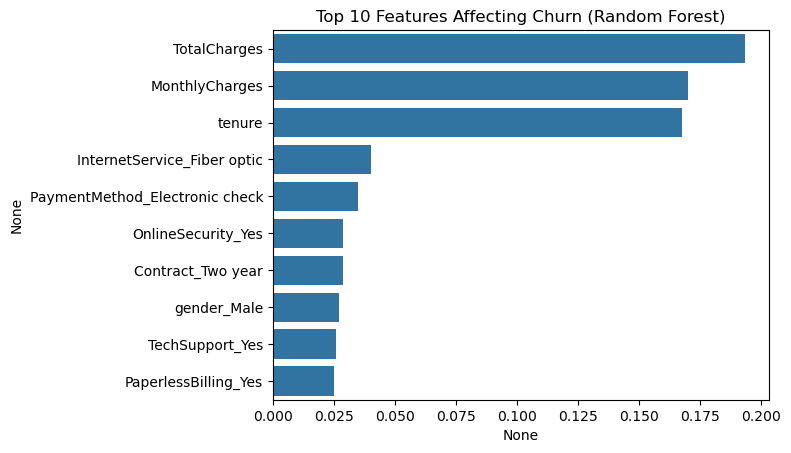

In [21]:
#plot feature importance
feature_importance = pd.Series(rf_model.feature_importances_, index=X.columns)
top_features = feature_importance.sort_values(ascending=False).head(10)

sns.barplot(x=top_features, y=top_features.index)
plt.title("Top 10 Features Affecting Churn (Random Forest)")
plt.show()

In [22]:
import pickle

In [34]:
#save feature and column name
model_columns = X_train.columns.tolist()

#save Logistic Regression model to file
with open("logistic_model.pkl", "wb") as file:
    pickle.dump((lr_model,model_columns), file)

In [35]:
#save feature and column name
model_columns = X_train.columns.tolist()

#save Random Forest model to file
with open("random_forest_model.pkl", "wb") as file:
    pickle.dump((rf_model,model_columns), file)


In [37]:
# Load Random Forest model from file
with open("random_forest_model.pkl", "rb") as file:
    loaded_rf_model, model_columns = pickle.load(file) 

# Make predictions using the loaded model
loaded_rf_preds = loaded_rf_model.predict(X_test)